In [283]:
import pandas as pd

data = pd.read_csv("./data/dataset.csv", usecols=['energy', 'valence', 'tempo', 'track_id', 'track_name', 'artists', 'track_genre'])
subset_with_id_and_name = data.sample(50000)
subset = subset_with_id_and_name[['energy','valence','tempo']]

In [284]:
print(len(subset))
display(subset.head(10))

50000


,energy,valence,tempo
4011,0.4370,0.127,105.220
86727,0.9830,0.482,92.019
89417,0.6440,0.696,83.986
90828,0.9380,0.762,165.068
76466,0.3690,0.146,75.540
113679,0.8220,0.229,130.051
616,0.2630,0.868,115.854
26506,0.0334,0.237,111.069
49474,0.9380,0.517,147.509
70988,0.7210,0.188,179.905


## Plot Subset

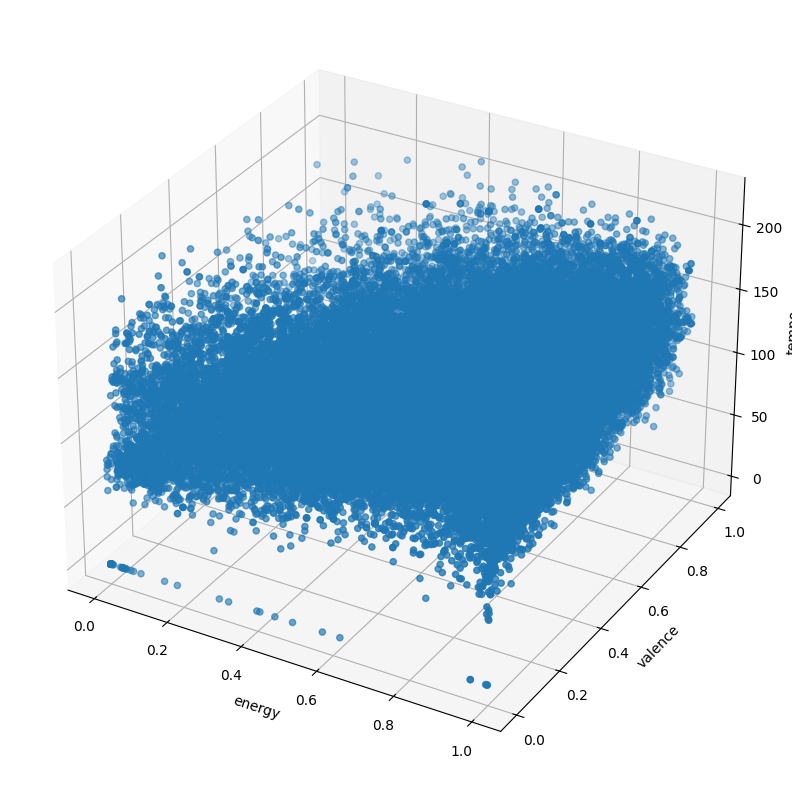

In [285]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(subset['energy'], subset['valence'], subset['tempo'])


ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Normalizing the data (Min Max Norming)

In [286]:
from sklearn import preprocessing

norm_subset = subset

norm_subset = (norm_subset - norm_subset.min()) / (norm_subset.max() - norm_subset.min())
norm_subset.head(10)
X_train_norm = norm_subset


### Plot normalized Data

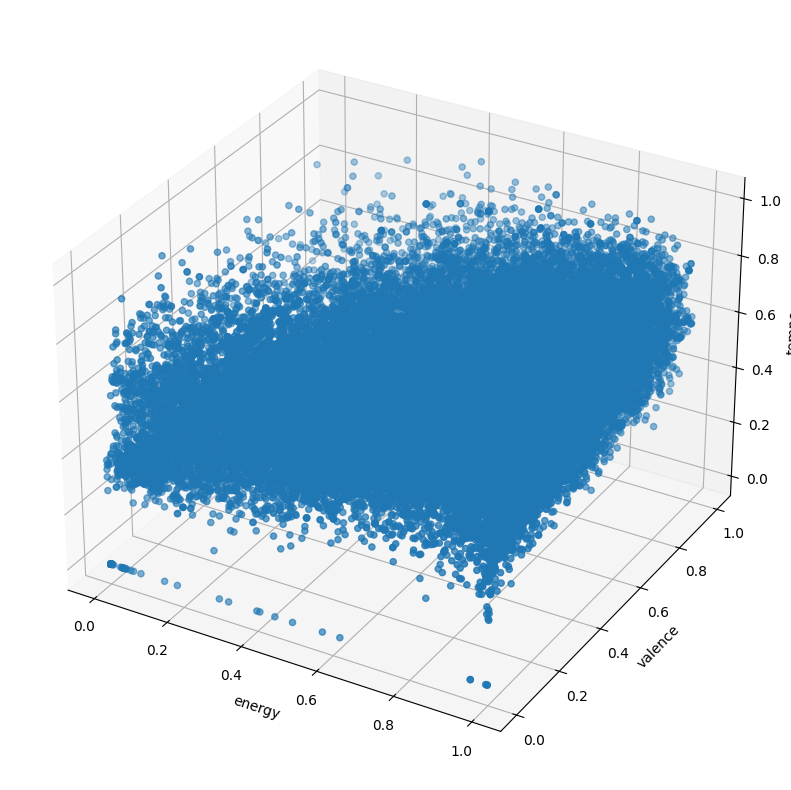

In [287]:
fig = plt.figure(figsize=[10,10])
ax = fig.add_subplot(projection="3d")

ax.scatter(norm_subset['energy'], norm_subset['valence'], norm_subset['tempo'])

ax.set_xlabel('energy')
ax.set_ylabel('valence')
ax.set_zlabel('tempo')

plt.show()

## Generating random Entry from normalized data sample

In [288]:
X_train_norm['org_index'] = subset_with_id_and_name.index
start_value = X_train_norm.sample(1)

## KMeans Clustering

In [289]:
def get_cluster(data, labels, start_label):
    cluster_points = data[labels == start_label]
    return cluster_points

In [290]:

from sklearn.cluster import KMeans
from tabulate import tabulate



kmeans = KMeans(n_clusters = 5000, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

start_label = kmeans.predict(start_value)
labels = kmeans.labels_

cluster_points = get_cluster(X_train_norm, labels, start_label)

original_indices = cluster_points['org_index']

print_table_kMeans = []
value_list_kMeans = []

for index in original_indices:
    print_table_kMeans.append([subset_with_id_and_name.loc[index].artists, subset_with_id_and_name.loc[index].track_name, subset_with_id_and_name.loc[index].track_genre])
    value_list_kMeans.append([X_train_norm.loc[index].energy, X_train_norm.loc[index].valence, X_train_norm.loc[index].tempo])
    
print(tabulate(print_table_kMeans, headers=['Artists','Trackname','Genre'])) 


Artists                     Trackname                                        Genre
--------------------------  -----------------------------------------------  -------------
Cajmere;Sonny Fodera        CO2 Vapor Remix - Original Mix                   chicago-house
Armando                     World Beat                                       chicago-house
Joe Smooth                  Promised Land                                    chicago-house
Robert Owens;Josh Butler    I'll Be Your Friend - Josh Butler Origins Remix  chicago-house
Chez Damier;Carl Craig      Help Myself - Reconstructed by Carl Craig        chicago-house
Robert Owens;Atjazz         Hearts And Soul - Christo'Disco Rinse'Remix      chicago-house
Ten City                    That's the Way Love Is - Underground Mix; Edit   chicago-house
Chez Damier;Ron Trent       Foot Therapy                                     chicago-house
Paul Johnson                Caliente Musica - Original Mix                   chicago-house
Ralphi 

In [291]:
print(original_indices)

13378    13378
13379    13379
13389    13389
13393    13393
13392    13392
13388    13388
13384    13384
13394    13394
13386    13386
13398    13398
Name: org_index, dtype: int64


# Nearest Neighbours

In [292]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

samples = X_train_norm

neigh = NearestNeighbors(n_neighbors=10)
neigh.fit(samples)
neighbour_indizes = neigh.kneighbors(start_value.to_numpy(), 10, return_distance=False)
    
print(neighbour_indizes)

[[37823 33089 44957 29753 39061 46277 47005 48101 41284 28732]]


c:\Users\Scheske\Documents\Private\Studium Ohm\Semester 7\Bionic Computing\BionicComputing\sklearn-env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## Extract Songs via indizes

In [293]:
print_table_kNearest = []
value_list_kNearest = []
org_indices_kNearest = []

# Get original indices
for index in neighbour_indizes:
    org_indices_kNearest.append(subset_with_id_and_name.iloc[index].index)

org_indices_kNearest = org_indices_kNearest[0]

for index in org_indices_kNearest:
    print_table_kNearest.append([subset_with_id_and_name.loc[index].artists, subset_with_id_and_name.loc[index].track_name, subset_with_id_and_name.loc[index].track_genre])
    value_list_kNearest.append([X_train_norm.loc[index].energy, X_train_norm.loc[index].valence, X_train_norm.loc[index].tempo])

## Evaluating both algorithms

In [294]:
print("Starting Track")
print(tabulate(subset_with_id_and_name.loc[start_value.org_index]))

print("\n\nKNearest Neighbours")
print(tabulate(print_table_kNearest, headers=['Artists','Trackname','Genre']))  

print("\n\nKMeans Clustering")
print(tabulate(print_table_kMeans, headers=['Artists','Trackname','Genre']))

Starting Track
-----  ----------------------  ----------------------  -----------------------------------------  -----  -----  -------  -------------
13392  3SlTrAJgDhEm73ybn8562E  Chez Damier;Carl Craig  Help Myself - Reconstructed by Carl Craig  0.856  0.515  126.465  chicago-house
-----  ----------------------  ----------------------  -----------------------------------------  -----  -----  -------  -------------


KNearest Neighbours
Artists                         Trackname                                        Genre
------------------------------  -----------------------------------------------  -------------
Chez Damier;Carl Craig          Help Myself - Reconstructed by Carl Craig        chicago-house
Robert Owens;Josh Butler        I'll Be Your Friend - Josh Butler Origins Remix  chicago-house
Chez Damier;Ron Trent           Foot Therapy                                     chicago-house
Joe Smooth                      Promised Land                                    chicago-ho

## Calculating ndcg Score

In [295]:
import numpy as np
from sklearn.metrics import ndcg_score

print(start_value)

# ground truth = energy, valence, tempo of starting song
start_value_array = [[start_value.iloc[0]['energy'], start_value.iloc[0]['valence'], start_value.iloc[0]['tempo']]]
#print(start_value_array)
#print(value_list_kMeans)
#print(value_list_kNearest)

score_array_kMeans = []
# calculating ndcg score for KMeans list
for entry in value_list_kMeans:
    score_array_kMeans.append(ndcg_score(start_value_array, [entry]))
    
#print("X")
#print(score_array_kMeans)


score_array_kNearest = []
# calculating ndcg score for KNearest list
for entry in value_list_kNearest:
    score_array_kNearest.append(ndcg_score(start_value_array, [entry]))
    

# Calc average of kMeans Scores
avg_kMeans = sum(score_array_kMeans) / len(score_array_kMeans)


# Calc average of kNearest Scores
avg_kNearest = sum(score_array_kNearest) / len(score_array_kNearest)

print("\n\nAverage scores of kMeans and kNearest")
print("kMeans:", round(avg_kMeans, 3))
print("kNearest:", round(avg_kNearest, 3))

       energy   valence     tempo  org_index
13392   0.856  0.517588  0.574622      13392


Average scores of kMeans and kNearest
kMeans: 0.976
kNearest: 0.978
